In [1]:
from stability_class import MultiFieldDarkEnergy
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse


params = {
    'V0': 2.15,
    'm': 50,
    'r0': 0,
    'alpha': np.sqrt(2),
    'x_p_init': 0.0,
    'x_t_init': 0.0,
    'y_1_init': 1e-5,
    'r_init': 0,
    'beta': 800,
    'f0': 1,
    'cosmo_constant': 0
}

r0_range = [0]
colors = ['red', 'blue', 'green']
plt.figure()
for i, r0 in enumerate(r0_range):
    params['r0'] = r0
    #params['V0'] = V0
    c = MultiFieldDarkEnergy(metric='exp', potential='exp_spinning', params=params, N_min = 0, N_max = 40, gamma=1)
    c.run_background_eq_of_motion()
    c.x_y_phase_plot()
    c.plot_swampland_bound()

    print('De Sitter Bound Lowest', min(c.get_de_sitter_bound()))
    field_derivative, delta_phi = c.get_field_derivative()
    print('Delta phi:', delta_phi)
    size = len(c.get_eq_of_state())
    w = c.get_eq_of_state()
    omega = c.get_omega_phi()
    N = c.sol['t']
    delta_phi_n = -1
    for j in range(size):
        cur = np.trapz(np.sqrt(3)*np.sqrt((1+w[:j])*omega[:j]), N[:j])
        if cur > 1:
            delta_phi_n = j
            break
    print(w[delta_phi_n], omega[delta_phi_n])
    plt.plot(w, omega, label=r"$x_r = x_{\theta} = $"+str(r0) +'\n dSB: '+"{:.2f}".format(min(c.get_de_sitter_bound())), color=colors[i])
    if delta_phi_n>0 :plt.plot(w[delta_phi_n], omega[delta_phi_n], 'go', color='black')
plt.xlim([-1.02, -0.4])
plt.ylim([-0.05, 1.05])
cur_uni = Ellipse(xy=(-1, 0.7), width=0.065, height=0.02, 
                        edgecolor='black', fc='black', lw=2)#, zorder=100)
ax = plt.gca()
ax.add_patch(cur_uni)
plt.xlabel(r'$w_{\phi}$')
plt.ylabel(r'$\Omega_{\phi}$')
plt.title(r'$f(r) =e^{\beta r}$')
plt.legend()
#plt.savefig('img/exp_spinning_p_-2_r_init.pdf', bbox_inches = 'tight')

plt.show()

KeyError: 'potential'

<Figure size 432x288 with 0 Axes>

0
1
2
3
4
5
6
7
8
9


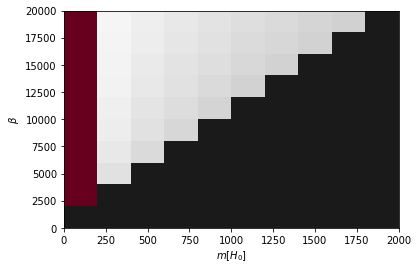

In [17]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

params = {
    'Omega_M_0': 0.3,
    'Omega_R_0': 6e-5,
    'V0': 2.15,
    'm': 10,
    'r0': 0,
    'alpha': 1*1e-3,
    'x_p_init': 0.0,
    'x_t_init': 0.0,
    'y_1_init': 1e-5,
    'p': 2,
    'r_init_multiplier': 1,
    'cosmo_constant': 0,
    'f0': 5e-7,
    'beta': 400,
}

cur_time = Polygon([(-1.05, 0.65), (-0.98, 0.75), (-0.98, 0.65), (-1.05, 0.75)])

length = 10
list_accepted = np.zeros((length, length))

beta_range = np.linspace(0, 20000, length)
m_range = np.linspace(0, 2000, length)

colors = ['red', 'blue']
plt.figure()
for i, beta in enumerate(beta_range):
    print(i)
    for j, m in enumerate(m_range):
        params['beta'] = beta
        params['m'] = m
        c = MultiFieldDarkEnergy(metric='exp', potential='exp_spinning', params=params, N_min = 0, N_max = 9, gamma=1)
        c.run_background_eq_of_motion()
        #c.plot_swampland_bound()
        field_derivative, delta_phi = c.get_field_derivative()
        size = len(c.get_eq_of_state())
        w = c.get_eq_of_state()
        omega = c.get_omega_phi()
        N = c.sol['t']
        cur_param = 0.5
        if min(c.get_de_sitter_bound()) < 0.5:
            cur_param = 0
            #print(p, m)
            #print('De Sitter violated', min(c.get_de_sitter_bound()))
        else:
            for k in range(size):
                point = Point(w[k], omega[k])
                if cur_time.contains(point):
                    # This solution has once been in omega=0.7 w=-1
                    #print('H:', c.get_H()[k])
                    cur = np.trapz(np.sqrt(3)*np.sqrt((1+w[:k])*omega[:k]), N[:k])
                    # cur = delta phi at omega=0.7 w=-1
                    cur_param = 0.5 + cur
                    if cur > 1:
                        cur_param= 1
                        print
                    break
                elif k == size-1:
                    # This solution has NEVER been in omega=0.7 w=-1
                    cur_param = 1
        if omega[size-1] < 0.9 and w[size-1] < -0.8:
            cur_param=-1        
        list_accepted[i, j] = cur_param
        #if cur_param == 1:
        #    print('Last eq of state:', w[size-1])
        #print(cur_param, p, m)


plt.xlabel(r'$m [H_0]$')
plt.ylabel(r'$\beta$')
plt.imshow(list_accepted, origin = 'lower', extent=[np.amin(m_range), np.amax(m_range), np.amin(beta_range), np.amax(beta_range)], aspect='auto',cmap='RdGy')
#plt.colorbar()

#plt.savefig('img/exp_metric/color_vary_m_beta.pdf', bbox_inches = 'tight')

plt.show()

0
1
2
3
4
5
6
7
8
9


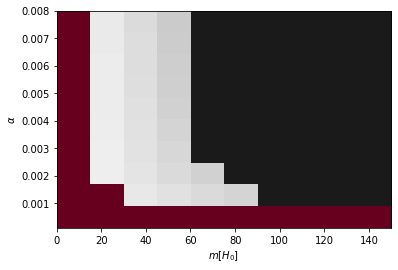

In [28]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

params = {
    'Omega_M_0': 0.3,
    'Omega_R_0': 6e-5,
    'V0': 2.15,
    'm': 10,
    'r0': 0,
    'alpha': 1*1e-3,
    'x_p_init': 0.0,
    'x_t_init': 0.0,
    'y_1_init': 1e-5,
    'p': 2,
    'r_init_multiplier': 1,
    'cosmo_constant': 0,
    'f0': 5e-7,
    'beta': 1000,
}

cur_time = Polygon([(-1.05, 0.65), (-0.98, 0.75), (-0.98, 0.65), (-1.05, 0.75)])

length = 10
list_accepted = np.zeros((length, length))

alpha_range = np.linspace(1e-4, 8e-3, length)
m_range = np.linspace(0, 150, length)

colors = ['red', 'blue']
plt.figure()
for i, alpha in enumerate(alpha_range):
    print(i)
    for j, m in enumerate(m_range):
        params['alpha'] = alpha
        params['m'] = m
        c = MultiFieldDarkEnergy(metric='exp', potential='exp_spinning', params=params, N_min = 0, N_max = 9, gamma=1)
        c.run_background_eq_of_motion()
        #c.plot_swampland_bound()
        field_derivative, delta_phi = c.get_field_derivative()
        size = len(c.get_eq_of_state())
        w = c.get_eq_of_state()
        omega = c.get_omega_phi()
        N = c.sol['t']
        cur_param = 0.5
        if min(c.get_de_sitter_bound()) < 0.5:
            cur_param = 0
            #print(p, m)
            #print('De Sitter violated', min(c.get_de_sitter_bound()))
        else:
            for k in range(size):
                point = Point(w[k], omega[k])
                if cur_time.contains(point):
                    # This solution has once been in omega=0.7 w=-1
                    #print('H:', c.get_H()[k])
                    cur = np.trapz(np.sqrt(3)*np.sqrt((1+w[:k])*omega[:k]), N[:k])
                    # cur = delta phi at omega=0.7 w=-1
                    cur_param = 0.5 + cur
                    if cur > 1:
                        cur_param= 1
                        print
                    break
                elif k == size-1:
                    # This solution has NEVER been in omega=0.7 w=-1
                    cur_param = 1
        if omega[size-1] < 0.9 and w[size-1] < -0.8:
            cur_param=-1        
        list_accepted[i, j] = cur_param
        #if cur_param == 1:
        #    print('Last eq of state:', w[size-1])
        #print(cur_param, p, m)


plt.xlabel(r'$m [H_0]$')
plt.ylabel(r'$\alpha$')
plt.imshow(list_accepted, origin = 'lower', extent=[np.amin(m_range), np.amax(m_range), np.amin(alpha_range), np.amax(alpha_range)], aspect='auto',cmap='RdGy')
#plt.colorbar()

plt.savefig('img/exp_metric/color_vary_m_alpha.pdf', bbox_inches = 'tight')

plt.show()